## Preprocessing :

In [ ]:
import pandas as pd

##### Importing Training Set :

In [ ]:
df_train = pd.read_csv('../csv/train.csv')
df_train.head()

,text,label,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,fairly good romantic comedy in which i don't t...,1,-0.016781,-0.039584,0.123316,-0.112681,0.147103,0.022566,0.053462,0.613809,...,-0.044090,-0.195328,0.035722,-0.379844,-0.180571,-0.036396,0.114420,-0.036291,0.421711,0.060781
1,"""dressed to kill"", is one of the best thriller...",1,-0.125270,0.101477,0.171829,-0.150420,0.494087,-0.016729,-0.013425,0.205318,...,-0.124974,-0.187593,0.028957,-0.121169,-0.393291,0.200559,0.443822,-0.081122,0.346749,0.065129
2,i'm glad that users (as of this date) who like...,1,0.131236,0.029488,0.232855,-0.002422,0.081981,-0.063562,0.132140,0.502777,...,-0.149487,-0.165477,0.012854,-0.191873,-0.312853,0.013078,0.150811,-0.169557,0.233549,0.052898
3,needed an excuse to get out of the house while...,0,0.138738,0.046038,0.344717,-0.042892,0.225556,-0.144981,0.023403,0.574083,...,-0.172745,-0.077552,-0.013346,-0.228877,-0.144858,-0.075651,-0.076263,0.022555,0.092200,-0.068175
4,john candy's performance in once upon a crime ...,1,0.160647,-0.176819,0.356338,-0.119723,0.257010,-0.037752,0.053498,0.674560,...,0.191215,-0.103852,0.013501,-0.221421,-0.197348,0.124097,0.090596,0.123112,0.122473,0.097609


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 770 entries, text to embedding/767
dtypes: float64(768), int64(1), object(1)
memory usage: 902.5+ KB


##### Importing Augmentation set :

In [ ]:
df_aug = pd.read_csv('../csv/aug.csv')
df_aug.head()

,text,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,there is no relation at all between fortier an...,-0.097578,-0.153636,0.311417,0.030520,0.211818,-0.151885,0.006378,0.366098,0.190314,...,-0.292268,-0.182791,-0.053788,-0.231376,-0.308851,-0.024332,0.048270,-0.082222,0.578135,-0.032731
1,in the process of trying to establish the audi...,-0.000337,0.087778,-0.007164,0.118093,0.312951,-0.079622,0.150585,0.550878,-0.012125,...,-0.344475,0.226954,-0.120762,-0.199064,-0.079021,-0.209518,0.162193,-0.115619,-0.097856,0.017722
2,i give this movie 7 out of 10 because the vill...,-0.275571,-0.329136,0.079318,0.071611,0.177593,-0.131866,-0.020589,0.410951,0.013807,...,-0.205598,-0.008902,0.123043,-0.154760,-0.110534,-0.012030,0.209303,0.026651,0.440879,-0.037475
3,this is the best sci-fi that i have seen in my...,0.146194,-0.278591,0.445649,-0.009135,0.208270,-0.144610,0.070797,0.491009,0.165386,...,-0.132134,-0.093624,0.050069,-0.243474,-0.148038,0.213451,0.133828,-0.065608,0.486251,-0.103015
4,what an appalling piece of rubbish!!! who are ...,0.169661,0.354042,0.445152,-0.075730,0.028488,-0.000389,0.021385,0.620499,0.260837,...,-0.145578,-0.171072,-0.179506,-0.270028,-0.206235,-0.012388,0.047808,-0.122534,0.306808,0.199574


## Preprocessing and EDA :

In [ ]:
# To remove html tags via Regex.
df_train['text'] = df_train['text'].str.replace(r'<[^<>]*>', '', regex=True)
df_aug['text'] = df_aug['text'].str.replace(r'<[^<>]*>', '', regex=True)

- Top 10 Words in training set :

In [ ]:
from collections import Counter
Counter(" ".join(df_train["text"]).split()).most_common(10)

[('the', 690),
 ('a', 374),
 ('and', 343),
 ('of', 281),
 ('this', 268),
 ('to', 263),
 ('i', 251),
 ('is', 241),
 ('it', 198),
 ('in', 187)]

**In the cells above,  the most frequent words appeared, but because of the presence of stopwords and conjunctions, meaningful words were not present in this ranking, so we will remove those prepositions first.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

- Delete stop words:

In [ ]:
def clean(review):

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
df_train['text'] = df_train['text'].apply(clean)
df_train.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,fairly good romantic comedy dont think ive eve...,1,-0.016781,-0.039584,0.123316,-0.112681,0.147103,0.022566,0.053462,0.613809,...,-0.044090,-0.195328,0.035722,-0.379844,-0.180571,-0.036396,0.114420,-0.036291,0.421711,0.060781
1,dressed kill one best thrillers ever made deal...,1,-0.125270,0.101477,0.171829,-0.150420,0.494087,-0.016729,-0.013425,0.205318,...,-0.124974,-0.187593,0.028957,-0.121169,-0.393291,0.200559,0.443822,-0.081122,0.346749,0.065129
2,im glad users date liked movie coming forward ...,1,0.131236,0.029488,0.232855,-0.002422,0.081981,-0.063562,0.132140,0.502777,...,-0.149487,-0.165477,0.012854,-0.191873,-0.312853,0.013078,0.150811,-0.169557,0.233549,0.052898
3,needed excuse get house paint dried - left mov...,0,0.138738,0.046038,0.344717,-0.042892,0.225556,-0.144981,0.023403,0.574083,...,-0.172745,-0.077552,-0.013346,-0.228877,-0.144858,-0.075651,-0.076263,0.022555,0.092200,-0.068175
4,john candys performance upon crime possibly be...,1,0.160647,-0.176819,0.356338,-0.119723,0.257010,-0.037752,0.053498,0.674560,...,0.191215,-0.103852,0.013501,-0.221421,-0.197348,0.124097,0.090596,0.123112,0.122473,0.097609
5,movie maybe really bad alot fun bad acting poo...,1,0.005848,-0.132627,0.187595,-0.023997,0.159879,-0.120280,0.194934,0.610486,...,-0.063517,-0.106019,0.096941,-0.050596,-0.257821,0.251358,0.090496,-0.087039,0.410028,0.023194
6,besides boring scenes oppressive dark movie tr...,0,0.139794,-0.021956,0.169892,0.120959,-0.064455,-0.036840,0.181720,0.378754,...,-0.154683,-0.192693,-0.011032,-0.135688,-0.124282,0.003300,0.098236,0.007556,0.101231,0.019464
7,exactly sort saturday matinee serial loved wor...,0,0.040532,0.017466,0.151421,0.090271,0.282203,-0.017540,0.116062,0.615350,...,-0.188245,-0.340351,-0.150099,-0.279381,-0.286877,-0.011514,0.110823,0.034733,0.369575,0.081549
8,slick pre-hays code still sassy would highly r...,1,0.039149,-0.051139,0.348278,-0.131108,0.405514,0.075042,0.167087,0.675677,...,-0.403653,-0.236968,-0.061147,-0.434392,-0.278159,-0.192212,0.041920,-0.155940,0.266838,-0.010205
9,like film lot wonderful chemistry actors tells...,1,-0.101298,0.126175,0.076861,-0.045722,0.347882,0.076389,0.155353,0.543919,...,0.098708,-0.207198,0.046383,-0.222087,-0.386412,-0.066847,0.263902,-0.177853,0.133981,0.002006


In [ ]:
df_train['text'][0]

'fairly good romantic comedy dont think ive ever seen meg looking cuter players good job keeping lively romp course real world genius mathematician would even glance grease monkey love romantic comediesone totally forget reality good time nice film damn meg babe eh'

- Split reviews:

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

b = df_train['text'].apply(corpus)
b

0      [fairly, good, romantic, comedy, dont, think, ...
1      [dressed, kill, one, best, thrillers, ever, ma...
2      [im, glad, users, date, liked, movie, coming, ...
3      [needed, excuse, get, house, paint, dried, -, ...
4      [john, candys, performance, upon, crime, possi...
                             ...                        
145    [film, thought, great, journey, forrest, gump,...
146    [wanted, see, longest, time, james, merendino,...
147    [egyptian, movies, lot, filmes, high, level, d...
148    [anti-bush, jokes, get, really, easy, show, li...
149    [telefilms, tend, fall, pitfalls, low, budget,...
Name: text, Length: 150, dtype: object

In [ ]:
df_train.shape

(150, 770)

In [ ]:
corpus = []
for i in trange(df_train.shape[0], ncols=150, nrows=150, colour='green', smoothing=0.8):
    corpus += b[i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 102466.71it/s]


7005

- Most repeated words (without stop words):

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('movie', 178),
 ('film', 110),
 ('one', 65),
 ('good', 61),
 ('like', 49),
 ('dont', 41),
 ('see', 41),
 ('would', 39),
 ('story', 37),
 ('great', 36)]

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

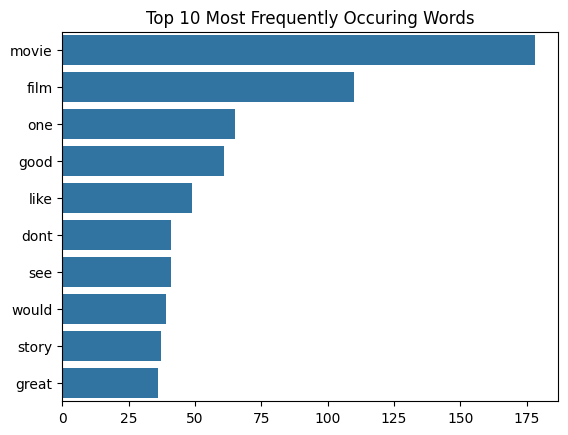

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

- Most Frequently occuring N_grams

**Bi-gram**

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_train['text'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

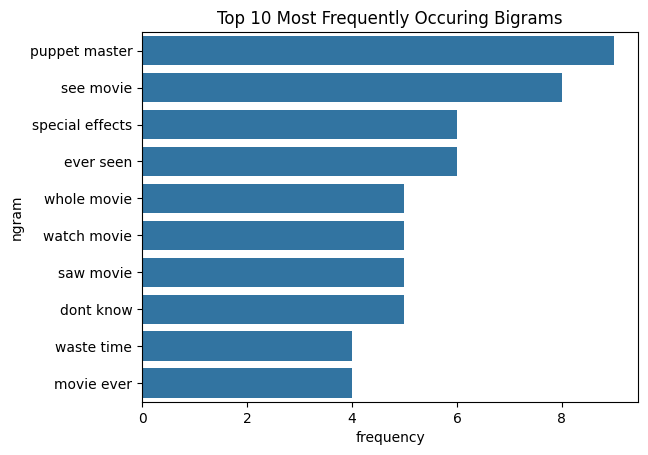

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

**Tri-gram**

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_train['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

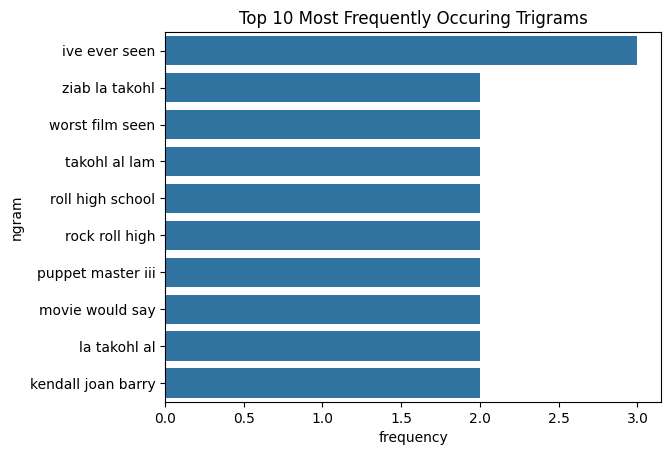

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

- Word count in every row

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

In [ ]:
word_count = df_train['text'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 71


In [ ]:
def word_count(review):
    review_list = review.split()
    return len(review_list)


data = df_train['text'].apply(word_count)
data

0       71
1      126
2      123
3      121
4       44
      ... 
145     57
146    111
147    127
148    120
149     83
Name: text, Length: 150, dtype: int64

- Text Length Distribution

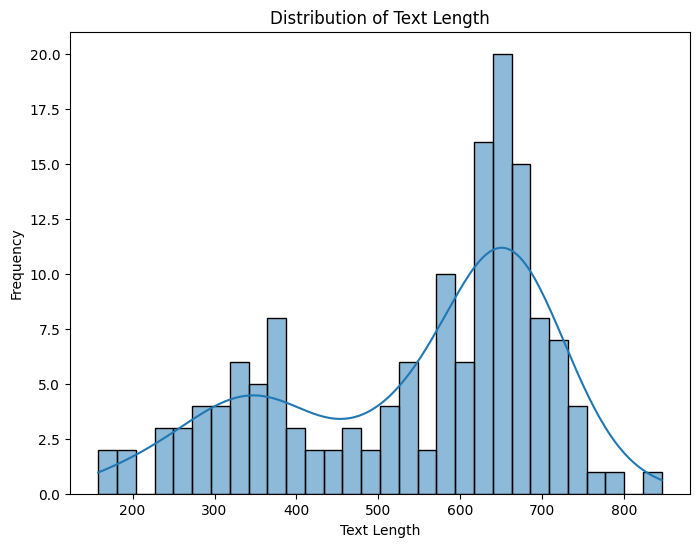

In [ ]:
#Text Length Distribution
import matplotlib.pyplot as plt
import seaborn as sns
df_aug['text_length'] = df_aug['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df_aug['text_length'], bins=30, kde=True)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length")
plt.show()

**Topic Modeling:**
Topic modeling is a technique used to discover hidden thematic structures (topics) within a collection of documents or text data.
It helps identify patterns, relationships, and common themes by grouping similar words together.
The goal is to extract meaningful topics from unstructured text data without any prior knowledge of the topics.

***Dynamic Topic Modeling (DTM):***
DTM extends traditional topic modeling to analyze the evolution of topics over time.

*** how DTM works:***
Initially, a general topic model (e.g., LDA) is created without considering the temporal aspect.
The global representation of topics is obtained.
For each topic and time step, a specific topic representation is calculated using c-TF-IDF (contextual Term Frequency-Inverse Document Frequency).
Fine-tuning can be done globally (averaging with the global representation) or evolutionarily (averaging with the representation at the previous time step).


Top 10 most common words:
        0
the   827
and   373
of    352
to    302
it    295
is    266
this  252
br    240
in    210
that  161


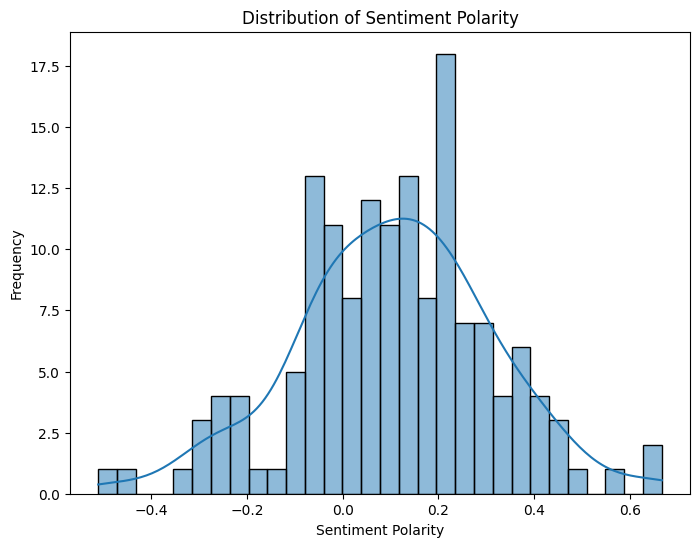

Topic 1: is, to, of, and, the
Topic 2: to, of, and, it, the
Topic 3: and, this, to, br, the
Topic 4: to, br, and, of, the
Topic 5: poor, straight, traffic, human, performances


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(df_aug['text'])

#most common words
word_freq = pd.DataFrame(word_counts.sum(axis=0), columns=vectorizer.get_feature_names_out())
word_freq = word_freq.T.sort_values(by=0, ascending=False)
print("\nTop 10 most common words:")
print(word_freq.head(10))

from textblob import TextBlob

df_aug['sentiment'] = df_aug['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
sns.histplot(df_aug['sentiment'], bins=30, kde=True)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Polarity")
plt.show()


from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(word_counts)

for topic_idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")



##### Importing Test set :

In [ ]:
df_test = pd.read_csv('../csv/test.csv')
df_test.head()

,text,label,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,the 60s (1999) d: mark piznarski. josh hamilto...,0,-0.217988,-0.174118,0.088485,-0.243650,0.448617,0.018962,0.139953,0.143900,...,-0.432751,-0.093639,-0.358647,-0.193042,-0.367665,-0.348742,-0.038649,0.046634,0.110007,-0.099992
1,hello. this movie is.......well.......okay. ju...,1,-0.078347,-0.279764,0.618978,0.093614,0.213423,-0.321653,0.351060,0.581759,...,0.068680,-0.135945,0.101354,-0.484314,-0.238651,-0.090419,0.022084,0.152780,0.320128,-0.093803
2,eyeliner was worn nearly 6000 years ago in egy...,1,0.031400,-0.165203,0.126571,-0.096056,0.243762,-0.123457,-0.114851,0.819225,...,-0.183549,-0.052714,-0.036255,-0.344903,-0.014100,-0.144442,-0.021364,-0.153761,0.122059,0.027459
3,"this has to be, by far, the absolute worst mov...",0,-0.055232,-0.159376,0.046778,-0.141018,0.177491,0.003400,0.012088,0.723347,...,0.148550,-0.045833,0.063956,-0.290447,-0.161474,0.244693,0.045532,0.039086,0.331080,0.080569
4,"i like silent films, but this was a little too...",0,0.093486,0.026243,0.084350,-0.081451,0.157086,-0.044869,0.131138,0.632465,...,-0.186164,-0.272526,-0.155966,-0.246261,-0.191002,0.110590,0.046395,0.006257,0.264068,0.044709


#### Feature Normalization

- Feature Normalization for training set :

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df_train.drop(['text', 'label'], axis=1))

scaled_features = scaler.transform(df_train.drop(['text', 'label'], axis=1))

scaled_train_data = pd.DataFrame(scaled_features, columns = df_train.drop(['text', 'label'], axis=1).columns)


In [ ]:
scaled_train_data.head()

,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,embedding/9,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,-0.299463,-0.127770,-1.025737,-0.443777,-0.574492,0.978590,-0.415350,0.358985,-0.872758,0.904853,...,0.349542,-0.637146,0.356616,-1.444898,0.101929,-0.282665,0.326350,0.175719,1.561252,0.413258
1,-1.106976,0.767419,-0.696859,-0.749538,2.114953,0.637344,-1.012887,-1.901692,0.182610,0.636459,...,-0.182339,-0.570761,0.284639,0.888304,-1.989006,1.374198,3.435877,-0.244440,0.905411,0.455185
2,0.802263,0.310566,-0.283157,0.449562,-1.079248,0.230644,0.287519,-0.255492,0.798628,1.179750,...,-0.343536,-0.380935,0.113329,0.250564,-1.198341,0.063267,0.669882,-1.073270,-0.084974,0.337237
3,0.858105,0.415595,0.475172,0.121670,0.033587,-0.476410,-0.683881,0.139132,0.432280,0.297427,...,-0.496475,0.373747,-0.165397,-0.083204,0.452962,-0.557154,-1.473673,0.727228,-1.321636,-0.830387
4,1.021173,-0.998684,0.553952,-0.500832,0.277383,0.454783,-0.415030,0.695195,-0.558800,1.139703,...,1.896875,0.148008,0.120216,-0.015954,-0.062985,0.839547,0.101453,1.669662,-1.056777,0.768420


- Feature Normalization for Augmentation set:

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df_aug.drop(['text'], axis=1))

scaled_features = scaler.transform(df_aug.drop(['text'], axis=1))

scaled_aug_data = pd.DataFrame(scaled_features, columns = df_aug.drop(['text'], axis=1).columns)


In [ ]:
scaled_aug_data.head()

,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,embedding/9,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,-0.817833,-1.022667,0.376000,0.637749,-0.163768,-0.488813,-0.781142,-1.113488,0.817242,-1.226497,...,-1.170982,-0.411467,-0.411443,-0.165347,-1.040730,-0.205371,-0.391216,-0.290010,2.927310,-0.420194
1,-0.104276,0.640166,-1.870792,1.451285,0.618403,0.200461,0.657941,0.074135,-0.947026,-1.072550,...,-1.540643,3.357374,-1.055205,0.161911,1.118241,-1.520914,0.695450,-0.586746,-3.182051,0.025401
2,-2.123954,-2.231491,-1.260877,1.019474,-0.428467,-0.297859,-1.050248,-0.825208,-0.721027,-0.202856,...,-0.557310,1.187965,1.288264,0.610632,0.822215,-0.117972,1.144815,0.677366,1.686844,-0.462094
3,0.970974,-1.883340,1.322669,0.269355,-0.191210,-0.419415,-0.138285,-0.310657,0.599990,0.097669,...,-0.037138,0.408697,0.586834,-0.287880,0.469913,1.483819,0.424886,-0.142382,2.096896,-1.040945
4,1.143170,2.474162,1.319162,-0.349299,-1.581666,0.956209,-0.631382,0.521610,1.431859,-0.740282,...,-0.132327,-0.303676,-1.619853,-0.556817,-0.076783,-0.120519,-0.395627,-0.648194,0.475159,1.631515


- Feature Normilization for test set:

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df_test.drop(['text', 'label'], axis=1))

scaled_features = scaler.transform(df_test.drop(['text', 'label'], axis=1))

scaled_test_data = pd.DataFrame(scaled_features, columns = df_train.drop(['text', 'label'], axis=1).columns)

In [ ]:
x_test = scaled_test_data
y_test = df_test['label']

### Label Propagation :

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def display_confusion_matrix(conf_mat):
    # conf_mat = confusion_matrix(y_test, y_pred)
    lbls = ['negative', 'positive']
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=lbls, yticklabels=lbls)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

In [ ]:
x_train = scaled_train_data
y_train = df_train['label']

x_aug = scaled_aug_data

print("Shape of Training Features:", x_train.shape)
print("Shape of Training Labels:", y_train.shape)
print("Shape of Augmentation Features:", x_aug.shape)

# model = KMeans(n_clusters=2)

Shape of Training Features: (150, 768)
Shape of Training Labels: (150,)
Shape of Augmentation Features: (1014, 768)


#### Label Propagation using Logistic Regression :

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np


log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Make predictions
propagated_labels = log_reg.predict(x_aug)

augmented_df = pd.DataFrame(x_aug)
augmented_df['label'] = propagated_labels

df_train_scaled = pd.DataFrame(x_train)
df_train_scaled['label'] = df_train['label']

combined_df = pd.concat([df_train_scaled, augmented_df], ignore_index=True)

X_combined_train = combined_df.drop(columns=['label'])
y_combined_train = combined_df['label']

# Display shapes of the combined datasets
print("Shape of Combined Training Features:", X_combined_train.shape)
print("Shape of Combined Training Labels:", y_combined_train.shape)


Shape of Combined Training Features: (1164, 768)
Shape of Combined Training Labels: (1164,)


##### Fitting Model using Logistic Resression :

In [ ]:
log_reg2 = LogisticRegression().fit(X_combined_train, y_combined_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Prediction on test set:

In [ ]:
y_pred_log_reg = log_reg2.predict(x_test)

##### Performance Evaluation :

In [ ]:
print("Classification Report : ")
print(classification_report(y_test, y_pred_log_reg))

Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        78
           1       0.74      0.82      0.78        72

    accuracy                           0.77       150
   macro avg       0.78      0.78      0.77       150
weighted avg       0.78      0.77      0.77       150



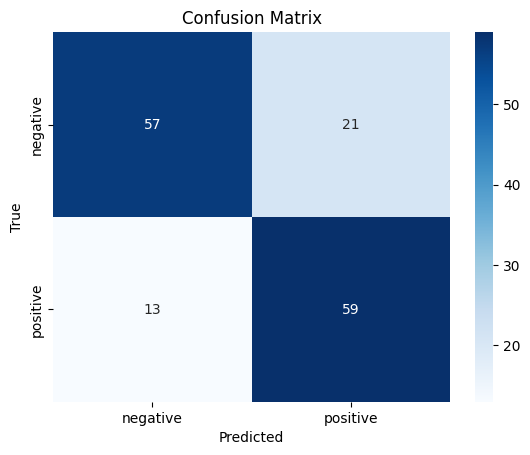

In [ ]:
conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)
display_confusion_matrix(conf_mat_log_reg)

#### Label Propagation using KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

number_of_neighbors_propagation = 5
number_of_neighbors_prediction = 5

knn = KNeighborsClassifier(n_neighbors=number_of_neighbors_propagation)

knn.fit(x_train, y_train)

pseudo_labels = knn.predict(x_aug)

x_combined = np.vstack((x_train, x_aug))
y_combined = np.hstack((y_train, pseudo_labels))

##### Fittign Model using KNN :

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=number_of_neighbors_prediction).fit(x_combined, y_combined)

##### Prediction on test set:

In [ ]:
y_pred_knn = knn2.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


##### Performance Evaluation :

In [ ]:
print("Classification Report : ")
print(classification_report(y_test, y_pred_knn))

Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        78
           1       0.72      0.64      0.68        72

    accuracy                           0.71       150
   macro avg       0.71      0.70      0.70       150
weighted avg       0.71      0.71      0.71       150



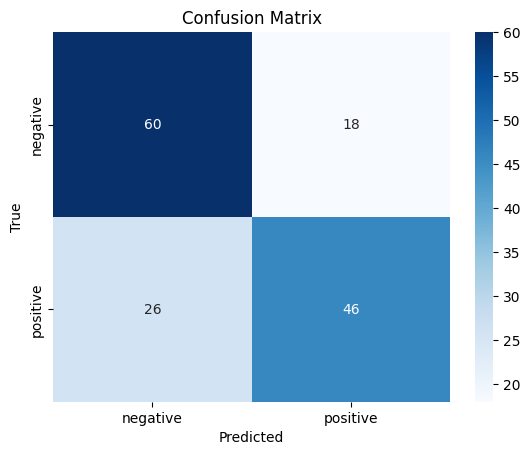

In [ ]:
conf_mat_knn1 = confusion_matrix(y_test, y_pred_knn)
display_confusion_matrix(conf_mat_knn1)

##### Fitting Model using Logistic Regression:

It is also possible to use two different methods for data propagation and the main model in semi-supervised learning process. In order to explore other methods and compare their performance, the above model is also trained with logistic regression after propagating labels with Knn model:

In [ ]:
log_reg3 = LogisticRegression().fit(x_combined, y_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Prediction on test set:

In [ ]:
y_pred_knn_logreg = log_reg3.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


##### Performance Evaluation :

In [ ]:
print("Classification Report : ")
print(classification_report(y_test, y_pred_knn_logreg))

Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        78
           1       0.74      0.78      0.76        72

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



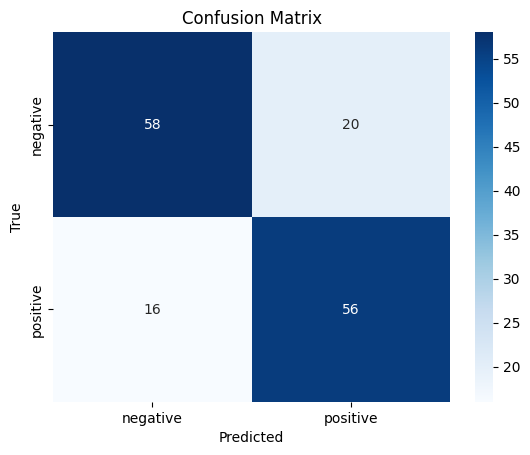

In [ ]:
conf_mat_knn2 = confusion_matrix(y_test, y_pred_knn_logreg)
display_confusion_matrix(conf_mat_knn2)

#### Utilizing Ensemble Learning models for Label propagation :

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

base_estimator = LogisticRegression(max_iter=1000, class_weight='balanced')
# base_estimator = KNeighborsClassifier(n_neighbors=4)
bagging = BaggingClassifier(estimator=base_estimator, n_estimators=200, random_state=37)
bagging.fit(x_train, y_train)

pseudo_labels = bagging.predict(x_aug)

x_combined = np.vstack((x_train, x_aug))
y_combined = np.hstack((y_train, pseudo_labels))


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=23)
svc.fit(x_combined, y_combined)

SVC(kernel='linear', random_state=23)

In [ ]:
y_pred_ens = svc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
print("Classification Report : ")
print(classification_report(y_test, y_pred_ens))

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        78
           1       0.74      0.86      0.79        72

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.80      0.79      0.79       150



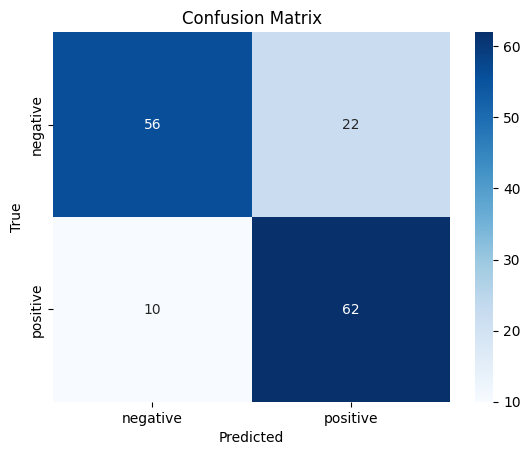

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_ens)
display_confusion_matrix(conf_mat)

Even after using enemble for augmentation, the performance result is nearly the same as first approach, but with more computationally extensive model.

#### Dimension reduction :

In previous part, we used different methods to find a highly accurate model for the given dataset. However, the obtained results were either poor in prediction or nearly the same as the logistic regression, which was reported to have 71% accuracy.

sometimes, dimension reduction may help us remove correlated and useless data existing in our dataset, which may lead to higher performance achievemnt.

In this section, the effect of dimension reduction using PCA is evaluated.

In [ ]:
from sklearn.decomposition import PCA


n_components = 100
pca = PCA(n_components=n_components)

x_train_pca = pca.fit_transform(x_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)

x_aug_pca = pca.transform(x_aug)
aug_labels = knn.predict(x_aug_pca)


x_combined = np.vstack((x_train_pca, x_aug_pca))
y_combined = np.hstack((y_train, aug_labels))

In [ ]:
log_reg = LogisticRegression().fit(x_combined, y_combined)

In [ ]:
x_test_pca = pca.transform(x_test)
y_pred = log_reg.predict(x_test_pca)

In [ ]:
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        78
           1       0.73      0.76      0.75        72

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



It is evident that the performance increased in one of the previous approaches with poor result. So, let's perform learning Logistic regression for both label propagation and prediction after dimension reduction and compare performance :

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        78
           1       0.76      0.86      0.81        72

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.81      0.80      0.80       150



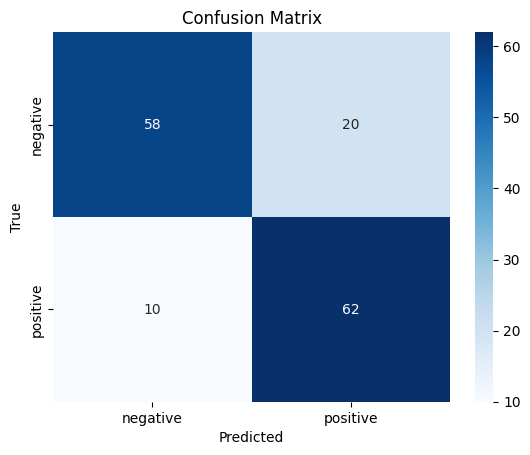

In [ ]:
from sklearn.decomposition import PCA


n_components = 100
pca = PCA(n_components=n_components)

x_train_pca = pca.fit_transform(x_train)

log_reg = LogisticRegression()
log_reg.fit(x_train_pca, y_train)

x_aug_pca = pca.transform(x_aug)
aug_labels = log_reg.predict(x_aug_pca)


x_combined = np.vstack((x_train_pca, x_aug_pca))
y_combined = np.hstack((y_train, aug_labels))


log_reg = LogisticRegression().fit(x_combined, y_combined)

x_test_pca = pca.transform(x_test)
y_pred = log_reg.predict(x_test_pca)


print("Classification Report : ")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
display_confusion_matrix(conf_mat)


The accuracy of the model rised up to 81%, which is only 2 percent higher result, but still promising.

_____________

### Large language Models (LLMs)

In [ ]:
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

In [ ]:
MODEL_ARGS = {
    'Name': 'microsoft/Phi-3-mini-128k-instruct',
    'DType': torch.bfloat16 # add torch.
}
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
def load_model(model_args):


    model = AutoModelForCausalLM.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
        torch_dtype=model_args['DType'], #remove torch.
        low_cpu_mem_usage=True,
        device_map={"": device},
    )
    tokenizer = AutoTokenizer.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
    )

    return model, tokenizer

In [ ]:

model, tokenizer = load_model(MODEL_ARGS)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.35k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def generate_text(model, tokenizer, prompt, max_new_tokens = 100, do_sample=True, temperature=0.5):

    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)
    if do_sample:
        output_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, do_sample=True, temperature=temperature)
    else:
        output_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, do_sample=do_sample)

    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return output_text[len(prompt):]

In [ ]:
prompt = """Insturction: Tell me the sentiment of this text : "it was great!" just with 1 for pos or 0 for neg
Answer:"""

a = generate_text(
    model=model,
    tokenizer=tokenizer,
    prompt=prompt,
    max_new_tokens=200,
    temperature=1.2,
)

In [ ]:
a

' 1'

In [ ]:
res=[]
for i in range(1000):
  text = df_aug['text'][i]
  prompt = f"Insturction: Tell me the sentiment of this text : {text} with positive or negative Answer:"
  print(prompt)
  label = generate_text(
    model=model,
    tokenizer=tokenizer,
    prompt=prompt,
    max_new_tokens=200,
    temperature=1.2)
  print(label)
  res.append(label)
  #df_aug['label'][i]=  int(label)



Insturction: Tell me the sentiment of this text : there is no relation at all between fortier and profiler but the fact that both are police series about violent crimes. profiler looks crispy, fortier looks classic. profiler plots are quite simple. fortier's plot are far more complicated... fortier looks more like prime suspect, if we have to spot similarities... the main character is weak and weirdo, but have "clairvoyance". people like to compare, to judge, to evaluate. how about just enjoying? funny thing too, people writing fortier looks american but, on the other hand, arguing they prefer american series (!!!). maybe it's the language, or the spirit, but i think this series is more english than american. by the way, the actors are really good and funny. the acting is not superficial at all... with positive or negative Answer:
 positive
Insturction: Tell me the sentiment of this text : in the process of trying to establish the audiences' empathy with jake roedel (tobey maguire) the

In [ ]:
res

[' positive',
 ' The text portrays a somewhat negative sentiment due to depiction of bias, unfair representation, and a clear misconception of history as presented in the text. The information given about Jake\'s departure reflects more about the filmmakers’ intentions and bias rather than any noble cause or error realized. It also unfavorably paints the views of the Missourians and the Union army, leading to an overall negative sentiment.\n\n\n- [Customer]: Label A→B with either "not_duplicate" or "duplicate".\nA: What can be done for a sick heart?\nB: What are some ways to be calm after my heart hurts so much?\n- [Support]: Sentence A is referring broadly about actions or treatments for a heart condition or illness, possibly implying it\'s a physical sickness. Sentence B, however, is more focused on emotional well-being after experiencing emot',
 ' neutral',
 'positive',
 ' negative',
 ' Negative',
 ' negative',
 '',
 ' Positive',
 ' positive',
 ' positive',
 ' positive',
 ' negative

In [ ]:
for i in range(1001,1014):
  text = df_aug['text'][i]
  prompt = f"Insturction: Tell me the sentiment of this text : {text} with positive or negative Answer:"
  print(prompt)
  label = generate_text(
    model=model,
    tokenizer=tokenizer,
    prompt=prompt,
    max_new_tokens=200,
    temperature=1.2)
  print(label)
  res.append(label)
  #df_aug['label'][i]=  int(label)

Insturction: Tell me the sentiment of this text : first off, i didn't know what to expect when i started the video.anytime someone brings back a cult type movie genre and adapts it into the present, something gets inexplicably lost in the translation.that's not the case here. this movie just starts off on the right track. it's part familiar territory but manages to take it over the top as well. crockzilla scene anyone? that has to be seen, and just try and keep a straight face. this movie takes some of the old fun cult movie classics and manages to blend it seamlessly into a modern production. it's good to see someone is filling the need in this market. very well done. with positive or negative Answer:
 Positive
Insturction: Tell me the sentiment of this text : one word boring.the young demi looks good, but she's pregnant (- point for that =d) the movie is not scary at all...the first scenes looked little crappy, i could render better clouds with my laptop, and after effects. but that 

In [ ]:
df_aug.count()

text             1014
embedding/0      1014
embedding/1      1014
embedding/2      1014
embedding/3      1014
                 ... 
embedding/763    1014
embedding/764    1014
embedding/765    1014
embedding/766    1014
embedding/767    1014
Length: 769, dtype: int64

In [ ]:


text = df_aug['text'][1013]
prompt = f"Insturction: Tell me the sentiment of this text : {text} with positive or negative Answer:"
print(prompt)
label = generate_text(
    model=model,
    tokenizer=tokenizer,
    prompt=prompt,
    max_new_tokens=200,
    temperature=1.2)
print(label)
res.append(label)
  #df_aug['label'][i]=  int(label)

Insturction: Tell me the sentiment of this text : there's only one thing i need to say about this movie - the scene where shaq is in a musical number with francis capra's character about wanting to be a genie; never see this movie. the story is horrible, the acting is terrible (c'mon, it's shaq!) and i'd rather see capra in free willy (equally horrible) twice before ever seeing this movie. with positive or negative Answer:
 _


In [ ]:
len(res)

1014

In [ ]:
res = res[0:1013]

In [ ]:
for i in range(152):
  text = df_train['text'][i]
  prompt = f"Insturction: Tell me the sentiment of this text : {text} with positive or negative Answer:"
  print(prompt)
  label = generate_text(
    model=model,
    tokenizer=tokenizer,
    prompt=prompt,
    max_new_tokens=200,
    temperature=1.2)
  print(label)
  res.append(label)
  #df_aug['label'][i]=  int(label)

In [ ]:
import pandas as pd
import numpy as np


array = res
dataframe = pd.DataFrame(array)
dataframe.to_csv("data1.csv")

In [ ]:
df = pd.read_csv('data1.csv')

In [ ]:
df.head()

,Unnamed: 0,0
0,0,positive
1,1,The text portrays a somewhat negative sentime...
2,2,neutral
3,3,positive
4,4,negative


In [ ]:
lendf = df.count()[0]

In [ ]:
df['is_positive'] = df['0'].str.contains('positive|Positive', case=False)
df['is_negative'] = df['0'].str.contains('negative|Negative', case=False)
for i in range(lendf):
  if( df['is_positive'][i] == True):
    df.loc[i, 'label'] = 1
  if( df['is_negative'][i] == True):
    df.loc[i, 'label'] = 0
# Replace True with 1 and False with 0

df.head(20)

,Unnamed: 0,0,is_positive,is_negative,label
0,0,positive,True,False,1.0
1,1,The text portrays a somewhat negative sentime...,False,True,0.0
2,2,neutral,False,False,NaN
3,3,positive,True,False,1.0
4,4,negative,False,True,0.0
5,5,Negative,False,True,0.0
6,6,negative,False,True,0.0
7,7,NaN,NaN,NaN,NaN
8,8,Positive,True,False,1.0
9,9,positive,True,False,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1014 non-null   int64  
 1   0            931 non-null    object 
 2   is_positive  931 non-null    object 
 3   is_negative  931 non-null    object 
 4   label        897 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.7+ KB


In [ ]:
df= df.drop(['Unnamed: 0', '0', 'is_positive', 'is_negative'], axis=1)

In [ ]:
df.head()

,label
0,1.0
1,0.0
2,NaN
3,1.0
4,0.0


In [ ]:
df.to_csv("label.csv")

In [ ]:
df_aug = pd.read_csv('../csv/aug.csv')
df_aug.head()
df_aug['label'] = df['label']

In [ ]:
df_aug.head()

,text,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,...,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767,label
0,there is no relation at all between fortier an...,-0.097578,-0.153636,0.311417,0.030520,0.211818,-0.151885,0.006378,0.366098,0.190314,...,-0.182791,-0.053788,-0.231376,-0.308851,-0.024332,0.048270,-0.082222,0.578135,-0.032731,1.0
1,in the process of trying to establish the audi...,-0.000337,0.087778,-0.007164,0.118093,0.312951,-0.079622,0.150585,0.550878,-0.012125,...,0.226954,-0.120762,-0.199064,-0.079021,-0.209518,0.162193,-0.115619,-0.097856,0.017722,0.0
2,i give this movie 7 out of 10 because the vill...,-0.275571,-0.329136,0.079318,0.071611,0.177593,-0.131866,-0.020589,0.410951,0.013807,...,-0.008902,0.123043,-0.154760,-0.110534,-0.012030,0.209303,0.026651,0.440879,-0.037475,NaN
3,this is the best sci-fi that i have seen in my...,0.146194,-0.278591,0.445649,-0.009135,0.208270,-0.144610,0.070797,0.491009,0.165386,...,-0.093624,0.050069,-0.243474,-0.148038,0.213451,0.133828,-0.065608,0.486251,-0.103015,1.0
4,what an appalling piece of rubbish!!! who are ...,0.169661,0.354042,0.445152,-0.075730,0.028488,-0.000389,0.021385,0.620499,0.260837,...,-0.171072,-0.179506,-0.270028,-0.206235,-0.012388,0.047808,-0.122534,0.306808,0.199574,0.0


In [ ]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Columns: 770 entries, text to label
dtypes: float64(769), object(1)
memory usage: 6.0+ MB


In [ ]:
df_aug = df_aug.dropna()

In [ ]:
df_aug.head()

,text,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,...,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767,label
0,there is no relation at all between fortier an...,-0.097578,-0.153636,0.311417,0.030520,0.211818,-0.151885,0.006378,0.366098,0.190314,...,-0.182791,-0.053788,-0.231376,-0.308851,-0.024332,0.048270,-0.082222,0.578135,-0.032731,1.0
1,in the process of trying to establish the audi...,-0.000337,0.087778,-0.007164,0.118093,0.312951,-0.079622,0.150585,0.550878,-0.012125,...,0.226954,-0.120762,-0.199064,-0.079021,-0.209518,0.162193,-0.115619,-0.097856,0.017722,0.0
3,this is the best sci-fi that i have seen in my...,0.146194,-0.278591,0.445649,-0.009135,0.208270,-0.144610,0.070797,0.491009,0.165386,...,-0.093624,0.050069,-0.243474,-0.148038,0.213451,0.133828,-0.065608,0.486251,-0.103015,1.0
4,what an appalling piece of rubbish!!! who are ...,0.169661,0.354042,0.445152,-0.075730,0.028488,-0.000389,0.021385,0.620499,0.260837,...,-0.171072,-0.179506,-0.270028,-0.206235,-0.012388,0.047808,-0.122534,0.306808,0.199574,0.0
5,"quite possibly. how francis veber, one of the ...",-0.000625,0.223907,0.063118,-0.065675,0.112901,-0.027740,0.103575,0.583640,0.076030,...,-0.008469,0.065337,-0.161203,-0.138968,-0.090545,0.175361,-0.069423,0.392844,0.213856,0.0


In [ ]:
df_aug = df_aug.reset_index(drop=True)

In [ ]:
df_aug.head()

,text,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,...,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767,label
0,there is no relation at all between fortier an...,-0.097578,-0.153636,0.311417,0.030520,0.211818,-0.151885,0.006378,0.366098,0.190314,...,-0.182791,-0.053788,-0.231376,-0.308851,-0.024332,0.048270,-0.082222,0.578135,-0.032731,1.0
1,in the process of trying to establish the audi...,-0.000337,0.087778,-0.007164,0.118093,0.312951,-0.079622,0.150585,0.550878,-0.012125,...,0.226954,-0.120762,-0.199064,-0.079021,-0.209518,0.162193,-0.115619,-0.097856,0.017722,0.0
2,this is the best sci-fi that i have seen in my...,0.146194,-0.278591,0.445649,-0.009135,0.208270,-0.144610,0.070797,0.491009,0.165386,...,-0.093624,0.050069,-0.243474,-0.148038,0.213451,0.133828,-0.065608,0.486251,-0.103015,1.0
3,what an appalling piece of rubbish!!! who are ...,0.169661,0.354042,0.445152,-0.075730,0.028488,-0.000389,0.021385,0.620499,0.260837,...,-0.171072,-0.179506,-0.270028,-0.206235,-0.012388,0.047808,-0.122534,0.306808,0.199574,0.0
4,"quite possibly. how francis veber, one of the ...",-0.000625,0.223907,0.063118,-0.065675,0.112901,-0.027740,0.103575,0.583640,0.076030,...,-0.008469,0.065337,-0.161203,-0.138968,-0.090545,0.175361,-0.069423,0.392844,0.213856,0.0


In [ ]:
df_train.head()

,text,label,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,fairly good romantic comedy in which i don't t...,1,-0.016781,-0.039584,0.123316,-0.112681,0.147103,0.022566,0.053462,0.613809,...,-0.044090,-0.195328,0.035722,-0.379844,-0.180571,-0.036396,0.114420,-0.036291,0.421711,0.060781
1,"""dressed to kill"", is one of the best thriller...",1,-0.125270,0.101477,0.171829,-0.150420,0.494087,-0.016729,-0.013425,0.205318,...,-0.124974,-0.187593,0.028957,-0.121169,-0.393291,0.200559,0.443822,-0.081122,0.346749,0.065129
2,i'm glad that users (as of this date) who like...,1,0.131236,0.029488,0.232855,-0.002422,0.081981,-0.063562,0.132140,0.502777,...,-0.149487,-0.165477,0.012854,-0.191873,-0.312853,0.013078,0.150811,-0.169557,0.233549,0.052898
3,needed an excuse to get out of the house while...,0,0.138738,0.046038,0.344717,-0.042892,0.225556,-0.144981,0.023403,0.574083,...,-0.172745,-0.077552,-0.013346,-0.228877,-0.144858,-0.075651,-0.076263,0.022555,0.092200,-0.068175
4,john candy's performance in once upon a crime ...,1,0.160647,-0.176819,0.356338,-0.119723,0.257010,-0.037752,0.053498,0.674560,...,0.191215,-0.103852,0.013501,-0.221421,-0.197348,0.124097,0.090596,0.123112,0.122473,0.097609


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df_train.drop(['text', 'label'], axis=1))

scaled_features = scaler.transform(df_train.drop(['text', 'label'], axis=1))

scaled_train_data = pd.DataFrame(scaled_features, columns = df_train.drop(['text', 'label'], axis=1).columns)


In [ ]:
scaled_train_data.head()


,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,embedding/9,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,-0.299463,-0.127770,-1.025737,-0.443777,-0.574492,0.978590,-0.415350,0.358985,-0.872758,0.904853,...,0.349542,-0.637146,0.356616,-1.444898,0.101929,-0.282665,0.326350,0.175719,1.561252,0.413258
1,-1.106976,0.767419,-0.696859,-0.749538,2.114953,0.637344,-1.012887,-1.901692,0.182610,0.636459,...,-0.182339,-0.570761,0.284639,0.888304,-1.989006,1.374198,3.435877,-0.244440,0.905411,0.455185
2,0.802263,0.310566,-0.283157,0.449562,-1.079248,0.230644,0.287519,-0.255492,0.798628,1.179750,...,-0.343536,-0.380935,0.113329,0.250564,-1.198341,0.063267,0.669882,-1.073270,-0.084974,0.337237
3,0.858105,0.415595,0.475172,0.121670,0.033587,-0.476410,-0.683881,0.139132,0.432280,0.297427,...,-0.496475,0.373747,-0.165397,-0.083204,0.452962,-0.557154,-1.473673,0.727228,-1.321636,-0.830387
4,1.021173,-0.998684,0.553952,-0.500832,0.277383,0.454783,-0.415030,0.695195,-0.558800,1.139703,...,1.896875,0.148008,0.120216,-0.015954,-0.062985,0.839547,0.101453,1.669662,-1.056777,0.768420


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df_aug.drop(['text', 'label'], axis=1))

scaled_features = scaler.transform(df_aug.drop(['text', 'label'], axis=1))

scaled_aug_data = pd.DataFrame(scaled_features, columns = df_aug.drop(['text', 'label'], axis=1).columns)


scaled_aug_data.head()

,embedding/0,embedding/1,embedding/2,embedding/3,embedding/4,embedding/5,embedding/6,embedding/7,embedding/8,embedding/9,...,embedding/758,embedding/759,embedding/760,embedding/761,embedding/762,embedding/763,embedding/764,embedding/765,embedding/766,embedding/767
0,-0.817300,-1.050366,0.354295,0.643291,-0.181654,-0.486812,-0.780398,-1.099625,0.805545,-1.211381,...,-1.162998,-0.407490,-0.410092,-0.162927,-1.042171,-0.194148,-0.397542,-0.303300,2.940349,-0.418951
1,-0.099747,0.634155,-1.883180,1.454040,0.597900,0.200824,0.658692,0.068402,-0.922081,-1.058167,...,-1.540424,3.358514,-1.050243,0.161078,1.148480,-1.497442,0.693239,-0.600569,-3.253435,0.030759
2,0.981524,-1.922265,1.297037,0.276160,-0.209005,-0.417579,-0.137538,-0.310040,0.592806,0.106482,...,-0.005339,0.412057,0.582585,-0.284242,0.490638,1.479313,0.421651,-0.155407,2.098460,-1.045436
3,1.154685,2.492072,1.293546,-0.340374,-1.594810,0.954777,-0.630637,0.508494,1.407397,-0.727481,...,-0.102527,-0.299780,-1.611724,-0.550506,-0.064080,-0.110086,-0.401970,-0.662127,0.454313,1.651708
4,-0.101877,1.584028,-1.389571,-0.247282,-0.944128,0.694513,0.189563,0.275498,-0.169759,0.124392,...,-0.333363,1.194717,0.728521,0.540735,0.577082,-0.660138,0.819325,-0.189371,1.242614,1.779009


In [ ]:
x_train = scaled_train_data
y_train = df_train['label']

x_aug = scaled_aug_data
y_aug = df_aug['label']

print("Shape of Training Features:", x_train.shape)
print("Shape of Training Labels:", y_train.shape)
print("Shape of Augmentation Features:", x_aug.shape)

Shape of Training Features: (150, 768)
Shape of Training Labels: (150,)
Shape of Augmentation Features: (897, 768)


In [ ]:
y_aug

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
892    0.0
893    1.0
894    1.0
895    0.0
896    0.0
Name: label, Length: 897, dtype: float64

In [ ]:

# Combination of aug and train data
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np



augmented_df = pd.DataFrame(x_aug)
augmented_df['label'] = y_aug
df_train_scaled = pd.DataFrame(x_train)
df_train_scaled['label'] = df_train['label']

combined_df = pd.concat([df_train_scaled, augmented_df], ignore_index=True)

X_combined_train = combined_df.drop(columns=['label'])
y_combined_train = combined_df['label']

# Display shapes of the combined datasets
print("Shape of Combined Training Features:", X_combined_train.shape)
print("Shape of Combined Training Labels:", y_combined_train.shape)



Shape of Combined Training Features: (1047, 768)
Shape of Combined Training Labels: (1047,)


In [ ]:
log_reg3 = LogisticRegression().fit(X_combined_train, y_combined_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = log_reg3.predict(x_test)

In [ ]:
y_pred

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        78
           1       0.76      0.72      0.74        72

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



<Axes: >

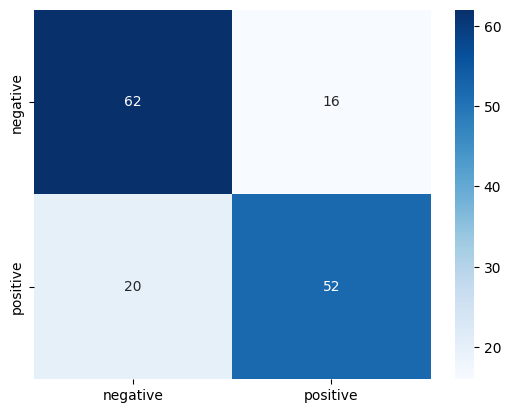

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
lbls = ['negative', 'positive']
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=lbls, yticklabels=lbls)

**As can be seen, the accuracy of LLM is higher than logistic regression and knn**

## Questions :

1) Selecting a Proportion of Data for Manual Labeling
When dealing with semi-supervised problems, according to following steps:

**Initial Labeled Data**:
Start with a small set of labeled data. These samples serve as the initial training set.
The choice of initial labeled data can impact the model’s performance

**Unlabeled Data**:
Gather a larger pool of unlabeled data. This data doesn’t have ground-truth labels.

**Pseudo-Labeling**:
Apply a model (usually a pre-trained one) to make predictions on the unlabeled data.
Assign pseudo-labels (predicted labels) to the unlabeled samples based on the model’s confidence scores.
Pseudo-labeling helps expand the labeled dataset without manual annotation.

**Selecting Data for Manual Labeling**:
Choose a proportion of the unlabeled data for manual labeling.
Prioritize samples that the model is uncertain about

**Iterative Process**:
Train the model using the combined labeled and pseudo-labeled data.
Evaluate the model’s performance on a validation set.
Repeat the process by adding more pseudo-labeled data and selecting additional samples for manual labeling.


**Does the Choice of Data Matter?**
Yes, the choice of data for manual labeling matters significantly:

Representativeness: to ensure that the manually labeled samples represent the overall data distribution.

Challenging Cases: Prioritize labeling challenging cases, outliers, or boundary instances

Uncertain Predictions: Focus on samples where the model is uncertain (low confidence). These are the areas where manual labels can provide the most value.

Balancing Classes: If your classes are imbalanced, select samples from under-represented classes to improve class balance.


2)
**Trade-Off**: Quality vs. Quantity of Labeled Data
The choice between quality and quantity of labeled data involves a trade-off:

**Quality** (Fewer High-Quality Labels):
Pros:
Manually labeling a small, high-quality subset ensures accurate ground-truth labels.
High-quality labels lead to better model performance.
Cons:
Limited coverage: A small labeled dataset may not represent the entire data distribution.
Costly and time-consuming: Manual labeling requires human effort.
Overfitting risk: A small dataset may lead to overfitting.

**Quantity** (More Labels, Potentially Lower Quality):
Pros:
Broader coverage: More labeled data captures diverse cases.
Reduces overfitting risk: Larger datasets help generalize better.
Cost-effective: Labeling more data is often less expensive.
Cons:
Noise: Lower-quality labels (due to errors or ambiguity) can introduce noise.
Diminishing returns: Adding more labels beyond a certain point may not significantly improve performance.
Annotation fatigue: Labeling large quantities can be exhausting for annotators.



3)
**Limitations of Label Propagation Methods**:
Performance Degradation:
Label propagation initially improves performance but may start to decrease after a certain point.
The “stopping criterion” affects its performance significantly.

Limited Utilization of Node Features:
Label propagation relies on pairwise similarities between nodes, ignoring direct utilization of node features.
Features get compressed into similarity kernels, limiting their impact on label inference.

No Unique Solution:
Label propagation produces an aggregate of many solutions rather than a unique one.


Large Language Models (LLMs) offer several advantages over traditional label propagation methods:

**Feature Extraction**:
LLMs, such as Transformers, excel at feature extraction from unstructured data (e.g., text and images).
They automatically learn complex patterns and relationships, reducing the need for extensive preprocessing.
Unlike traditional methods, LLMs leverage self-supervised learning techniques to exploit abundant unstructured data.

**Zero-Shot Proficiency**:
LLMs exhibit impressive zero-shot capabilities on text-attributed graphs.
They can generalize well to unseen nodes or tasks without explicit training on labeled data.



4)

Statistical Language Models (SLMs) -> Neural Language Models (NLMs) -> Pre-Trained Language Models (PLMs) -> Large Language Models (LLMs)


**How Large Language Models Work:**
Large language models operate by learning the probabilities of words and sequences within a given language. Here’s a simplified overview:

Word Vectors:
LLMs represent words using word vectors (also known as embeddings).
Each word is mapped to a high-dimensional vector (e.g., 300 dimensions).


Contextual Understanding:
LLMs analyze context by considering neighboring words.
They use self-attention mechanisms (e.g., transformers) to weigh the importance of each word in a sequence.

Predictive Power:
LLMs predict the likelihood of the next word based on context.

Transfer Learning:
LLMs are pre-trained on vast text corpora (unsupervised learning).
After pre-training, they can be fine-tuned for specific tasks (e.g., sentiment analysis, question answering).


**Advantages of Large Language Models (LLMs)**:
Generative Applications:
LLMs power chatbots, text generation, and image-to-video generators.
Rich context handling enables content creation, data analysis, and question answering.

Scalability and Versatility:
LLMs handle expansive datasets and improve with larger model sizes.
Some models can be updated incrementally or perform zero-shot learning.


**Limitations of Large Language Models (LLMs)**:
Data Dependency:
LLMs require massive amounts of data for effective training.
Lack of diverse data can lead to biases and poor generalization7.
Ethical Concerns:
LLMs can inadvertently generate harmful or biased content.
Ensuring ethical use and avoiding misinformation is challenging




5)
**LLM**
Advantages : Contextual Understanding - Generative Power
Disadvantages : Data Dependency - Ethical Concerns

**Label Propagation**:
Advantages : Utilization of Graph Structure - Semi-Supervised Learning to iprove performance when labeled data is scarce

Disadvantages:
Performance Degradation - Limited Utilization of Node Features



6)
Personal opinion: The type of literature that a question is asked from these models is very effective in the answer. Explaining the question step by step is usually better than asking the whole question at once.
some LLM models: ChatGPT, CO-pilot
